The car data has been obtained through web scraping from mercado libre page. The data covers used and new cars (0 km)

#1. Import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install jupyter-datatables
#from jupyter_datatables import init_datatables_mode


#2. Load data

In [2]:
#init_datatables_mode()
new = pd.read_csv("new_car.csv")
used= pd.read_csv("used_car.csv")

In [3]:
new.head(1)
used.head(1)

,Unnamed: 0,nombre articulo,precio,link,company,model,year,version,color,fuel,doors,transmisions,motor,bodywork,km
0,0,Ram 1500 Laramie 5.7 V8 Pick-up Cabina Doble.,U$S52.900,https://auto.mercadolibre.com.ar/MLA-131664927...,RAM,1500,2018,Laramie 5.7 V8 pick-up cabina doble.,Marrón,Nafta,4,Automática,5.7,Pick-Up,27618 km


In [4]:
print(f'Shape 0 km:{new.shape}')
print(f'Shape used car:{used.shape}')

Shape 0 km:(1967, 15)
Shape used car:(1968, 15)


#3. Data cleaning

Check 0 km cars

In [5]:
new['km'].value_counts()

0 km        1830
.             96
1000 km       17
500 km         3
2022 km        2
100            1
4000 km        1
50000 km       1
19000 km       1
5000 km        1
888 km         1
1500 km        1
2500 km        1
92000 km       1
79000 km       1
715 km         1
1001 km        1
14000 km       1
1111 km        1
34000 km       1
54000 km       1
21000 km       1
11111 km       1
1200 km        1
Name: km, dtype: int64

1830/1967 are 0 km cars. The rest of instances need to be removed.

In [6]:
new = new[new['km'] == '0 km']
new['km'].value_counts()

0 km    1830
Name: km, dtype: int64

Only with 0 km instances. The last column can be removed. Check the shape.

In [7]:
new.drop(['km'], axis = 1, inplace = True) 
print(f'Shape 0 km:{new.shape}')

Shape 0 km:(1830, 14)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Remove character of numeric features

In [8]:
new.head(1)

,Unnamed: 0,nombre articulo,precio,link,company,model,year,version,color,fuel,doors,transmisions,motor,bodywork
0,0,Volkswagen Amarok Cd V6 Extreme 3.0 258cv 4x4 At,$16.750.000,https://auto.mercadolibre.com.ar/MLA-112297900...,Volkswagen,Amarok CD,2022,v6 Extreme 3.0 258cv 4x4 at,Plateado,Diésel,4,Automática,3.0,Pick-Up


new (0 km) data price

<ipython-input-9-f1ad06fb65ba>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col1] = df[col1].str.replace('.','')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef0223b490>]],
      dtype=object)

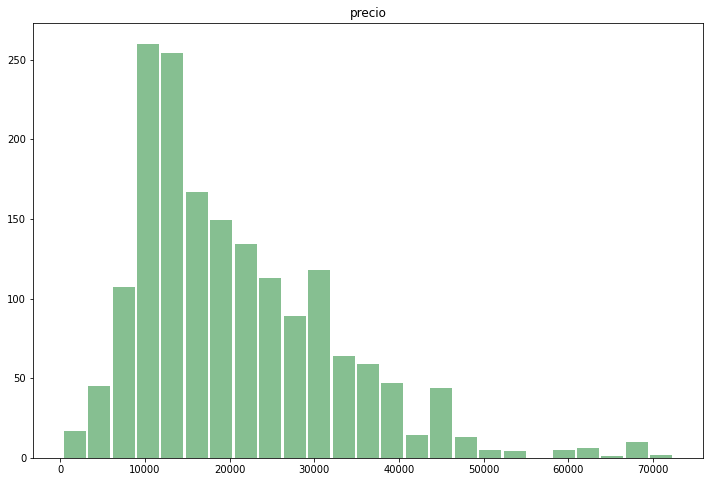

In [9]:
def new_fix_price(df, col1,usd):
  df[col1] = df[col1].str.lstrip('$')
  df[col1] = df[col1].str.replace('.','')
  df[col1] = pd.to_numeric(df[col1], downcast='integer', errors='coerce')
  df[col1] = df[col1]/usd
  return df.hist(column=col1, bins=25, 
grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

new_fix_price(new,'precio',383)

Used car price.

<ipython-input-10-3d282b211eba>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col1] = df[col1].str.replace('.','')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef02143f70>]],
      dtype=object)

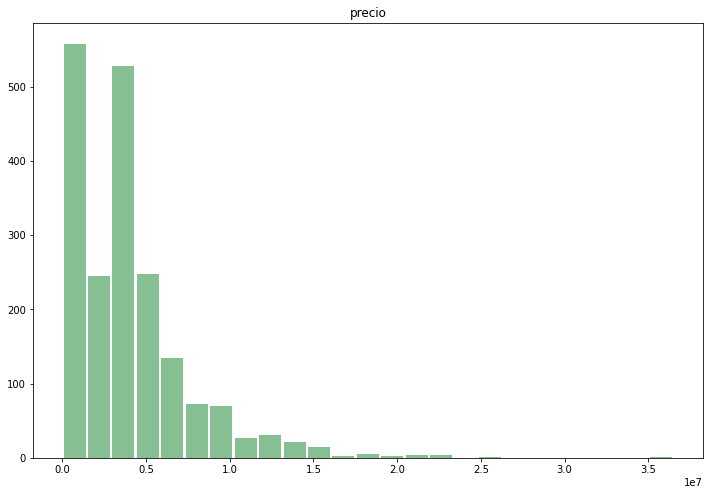

In [10]:
def used_fix_price(df, col1, col2):
  df[col1] = df[col1].str.lstrip('U$S')
  df[col1] = df[col1].str.replace('.','')
  df[col2] = df[col2].str.replace(' km','')
  df[col1] = pd.to_numeric(df[col1], downcast='integer', errors='coerce')
  return df.hist(column=col1, bins=25, 
grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

used_fix_price(used,'precio','km')

Some price values are in Argentine pesos and other in american dollar. According to 0 km car data. The maximum value was around U$S 72000. Thus, for used car, the price should be use lower than this value. 

Transform Argentine pesos into dollar for used car.

In [11]:
dolar = 385
used['precio'] = used['precio'].apply(lambda x: x/dolar if x > 100000 else x)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef01c443d0>]],
      dtype=object)

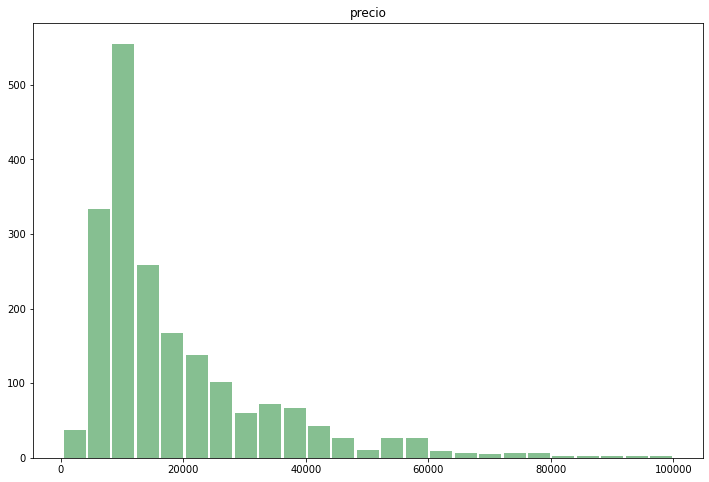

In [12]:
used.hist(column='precio', bins=25,  grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)



Transform string variables into numeric features.

In [13]:
def motor_fix(df):
  df['motor'] = df['motor'].str.replace(',','.').str.replace('[A-Za-z]','').str.replace('é','').str.replace('á','').str.replace('.','').str.replace('ó','').str.replace('-','')
  df['motor'] = pd.to_numeric(df['motor'], errors='coerce')
  df = df.dropna()
  return df.head(1)

motor_fix(used)



<ipython-input-13-8a03b15926ef>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['motor'] = df['motor'].str.replace(',','.').str.replace('[A-Za-z]','').str.replace('é','').str.replace('á','').str.replace('.','').str.replace('ó','').str.replace('-','')
<ipython-input-13-8a03b15926ef>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['motor'] = df['motor'].str.replace(',','.').str.replace('[A-Za-z]','').str.replace('é','').str.replace('á','').str.replace('.','').str.replace('ó','').str.replace('-','')


,Unnamed: 0,nombre articulo,precio,link,company,model,year,version,color,fuel,doors,transmisions,motor,bodywork,km
0,0,Ram 1500 Laramie 5.7 V8 Pick-up Cabina Doble.,52900.0,https://auto.mercadolibre.com.ar/MLA-131664927...,RAM,1500,2018,Laramie 5.7 V8 pick-up cabina doble.,Marrón,Nafta,4,Automática,57.0,Pick-Up,27618


Correct engine capacity of used car data.

In [14]:
used.loc[(used['motor'] >= 10) & (used['motor'] <= 99.9), 'motor'] /= 10
used.loc[(used['motor'] >= 100) & (used['motor'] <= 999.9), 'motor'] /= 100
used.loc[(used['motor'] >= 1000) & (used['motor'] <= 9999.9), 'motor'] /= 1000
used.loc[(used['motor'] >= 10000), 'motor'] /= 10000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef0218b5e0>]],
      dtype=object)

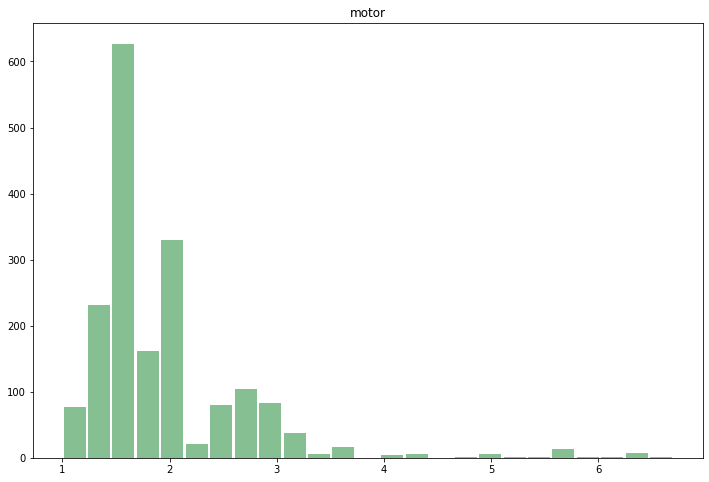

In [15]:
used.hist(column='motor', bins=25,  grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

The engine capacity of used car data is under factory level.

In [16]:
def string_to_num(df):
  #numeric 
  for col in ['year', 'doors','km']:
      df[col] = pd.to_numeric(df[col], downcast='integer', errors='coerce')
   
  return df.head(1)

string_to_num(used)

,Unnamed: 0,nombre articulo,precio,link,company,model,year,version,color,fuel,doors,transmisions,motor,bodywork,km
0,0,Ram 1500 Laramie 5.7 V8 Pick-up Cabina Doble.,52900.0,https://auto.mercadolibre.com.ar/MLA-131664927...,RAM,1500,2018.0,Laramie 5.7 V8 pick-up cabina doble.,Marrón,Nafta,4.0,Automática,5.7,Pick-Up,27618.0


In [17]:
new.head(1)

,Unnamed: 0,nombre articulo,precio,link,company,model,year,version,color,fuel,doors,transmisions,motor,bodywork
0,0,Volkswagen Amarok Cd V6 Extreme 3.0 258cv 4x4 At,43733.681462,https://auto.mercadolibre.com.ar/MLA-112297900...,Volkswagen,Amarok CD,2022,v6 Extreme 3.0 258cv 4x4 at,Plateado,Diésel,4,Automática,3.0,Pick-Up


In [18]:
for col in ['year', 'doors']:
      new[col] = pd.to_numeric(new[col], downcast='integer', errors='coerce')

##Value Counts of categorical features.

###Used cars

**Company**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


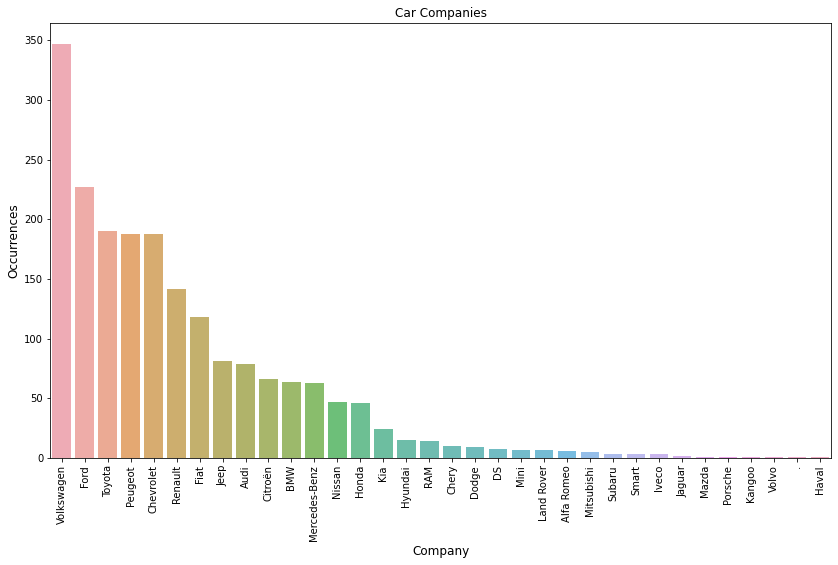

In [19]:
#cat_feature = ['company','model','version','color','fuel','transmisions','bodywork']

count  = used['company'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Car Companies')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Company', fontsize=12)
plt.show()

**Model**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


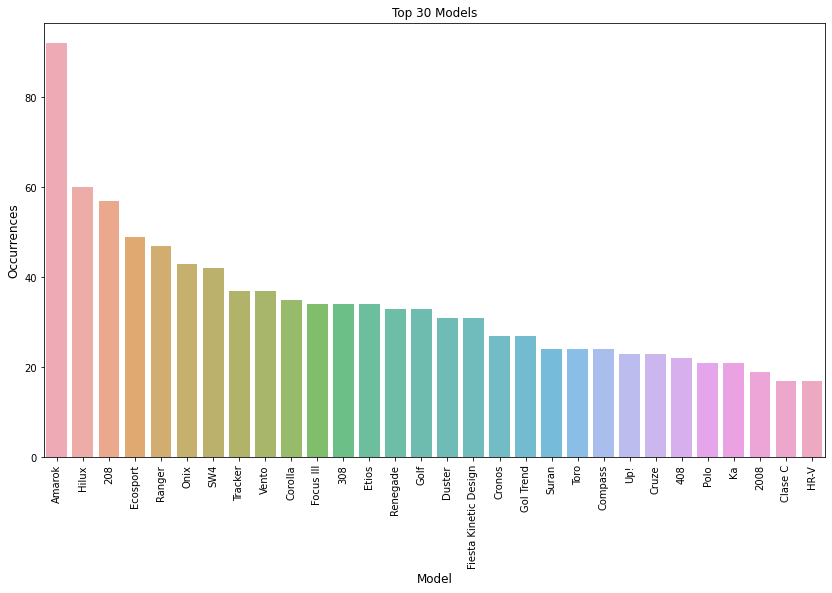

In [20]:
count  = used['model'].value_counts()
count = count[:30,]
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Top 30 Models')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Model', fontsize=12)
plt.show()

**Version**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


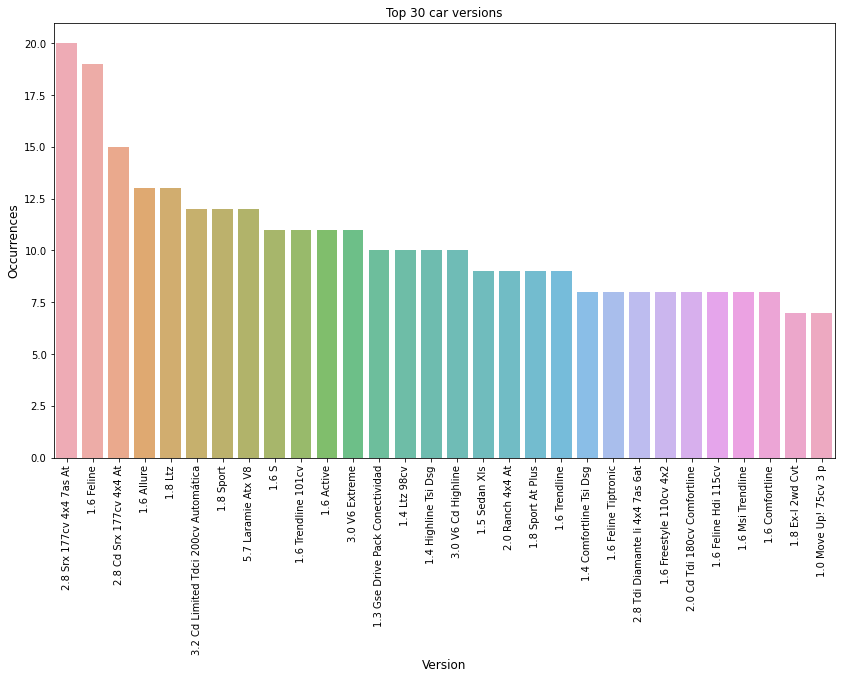

In [21]:
count  = used['version'].value_counts()
count = count[:30,]
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Top 30 car versions')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Version', fontsize=12)
plt.show()

**Color**

Two values: 'Nafta/GNC' and '.' are invalid, and need to be removed.

In [22]:
used = used.drop(used[used.color == 'Nafta/GNC'].index)
used = used.drop(used[used.color == '.'].index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


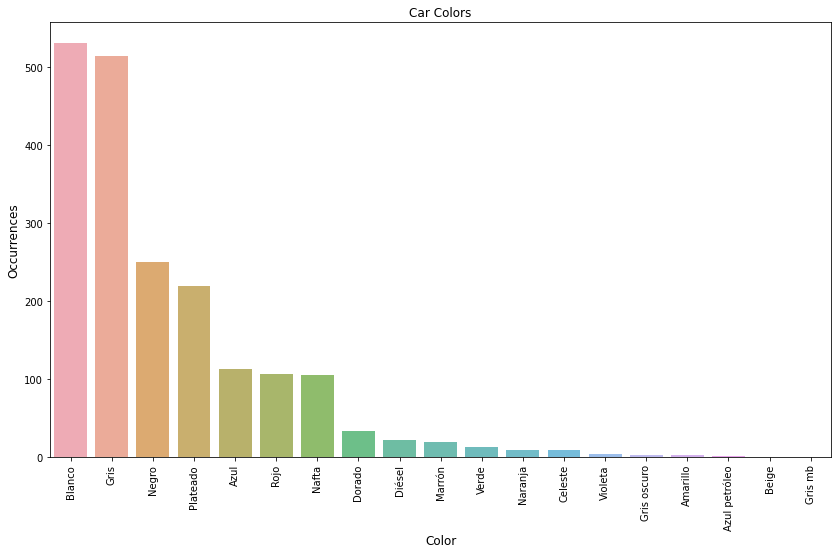

In [23]:
count  = used['color'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Car Colors')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Color', fontsize=12)
plt.show()

**Trasmision**

Valid values: 'Manual' and 'Automática'. The rest of values are invalid and need to be removed.

In [24]:
used = used[used['transmisions'].isin(['Manual','Automática'])]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


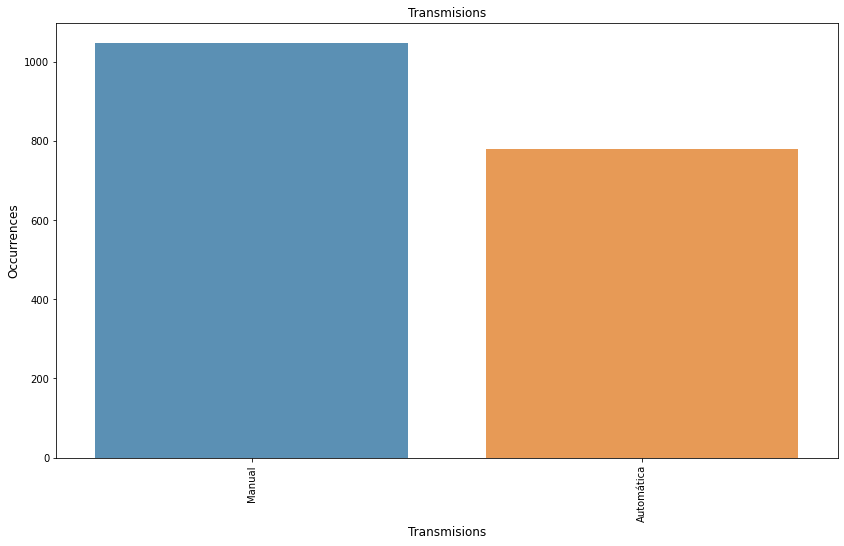

In [25]:
count  = used['transmisions'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Transmisions')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Transmisions', fontsize=12)
plt.show()

**Bodywork**

Values with 'km' or '.' are invalied and need to be removed.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


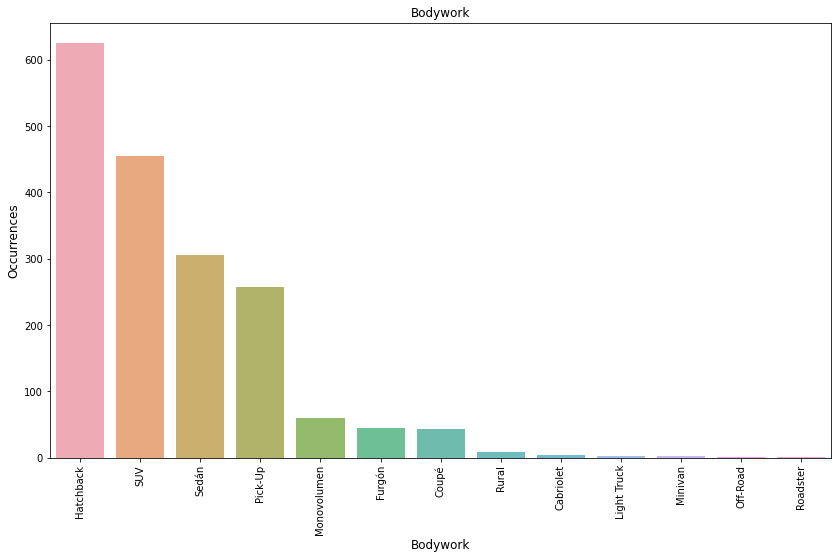

In [26]:
used = used[~used['bodywork'].str.endswith('km')]
used = used[~used['bodywork'].str.endswith('.')]
count  = used['bodywork'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Bodywork')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Bodywork', fontsize=12)
plt.show()

###New cars

**Company**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


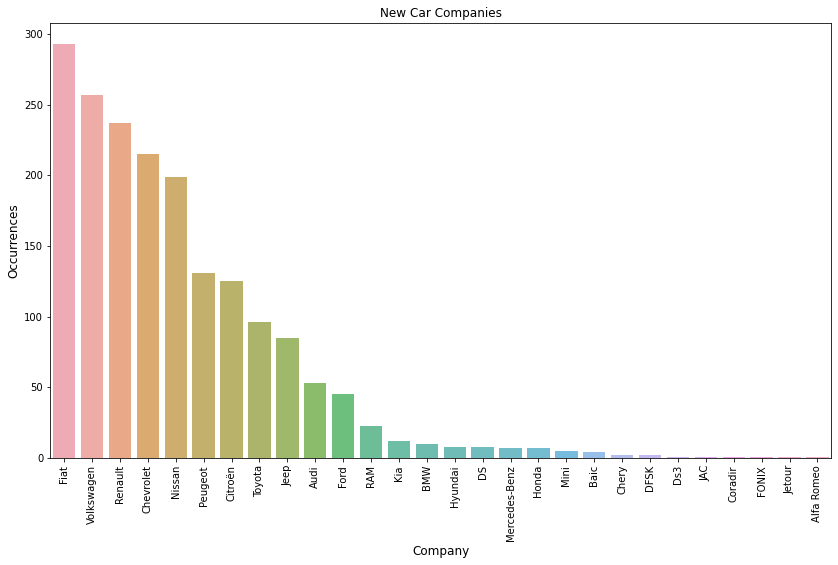

In [27]:
count  = new['company'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('New Car Companies')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Company', fontsize=12)
plt.show()

**Model**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


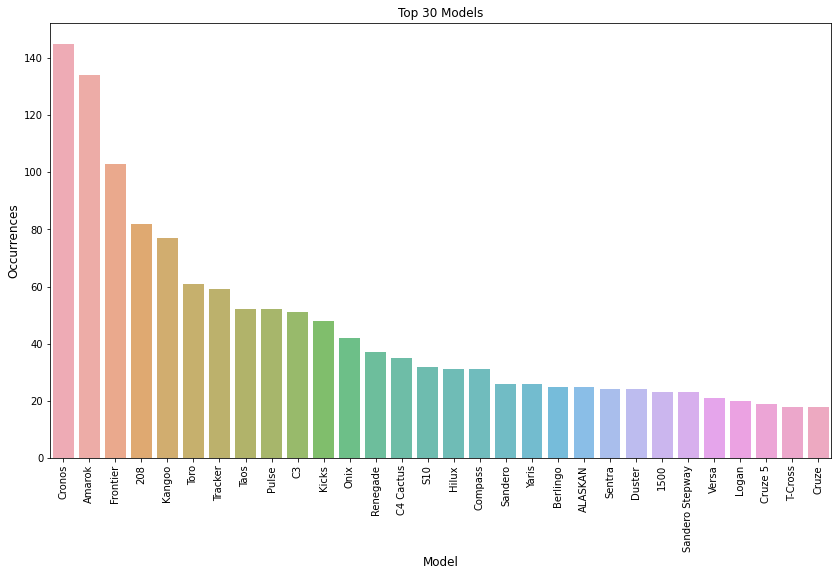

In [28]:
count  = new['model'].value_counts()
count = count[:30,]
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Top 30 Models')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Model', fontsize=12)
plt.show()

**Version**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


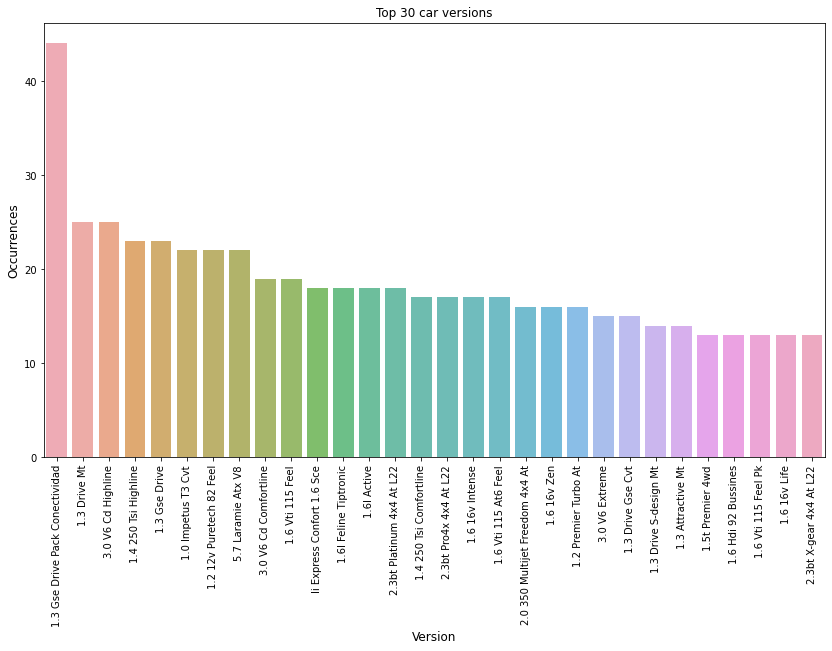

In [29]:
count  = new['version'].value_counts()
count = count[:30,]
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Top 30 car versions')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Version', fontsize=12)
plt.show()

**Color**

Remove invalid data.

In [39]:
new = new.drop(new[new.color == 'Volkswagen Amarok V6 Highline 0km Precio Nueva Autos Full B1'].index)
new = new.drop(new[new.color == 'VOLKSWAGEN - DISPONIBLE EN TODOS LOS HORARIOS'].index)
new = new.drop(new[new.color == 'a eleccion'].index)
new = new.drop(new[new.color == 'a elecion'].index)
new = new.drop(new[new.color == 'A eleccion'].index)
new = new.drop(new[new.color == 'A elecion'].index)
new = new.drop(new[new.color == 'A ELECCION'].index)
new = new.drop(new[new.color == 'Elegir'].index)
new = new.drop(new[new.color == 'Consultar'].index)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


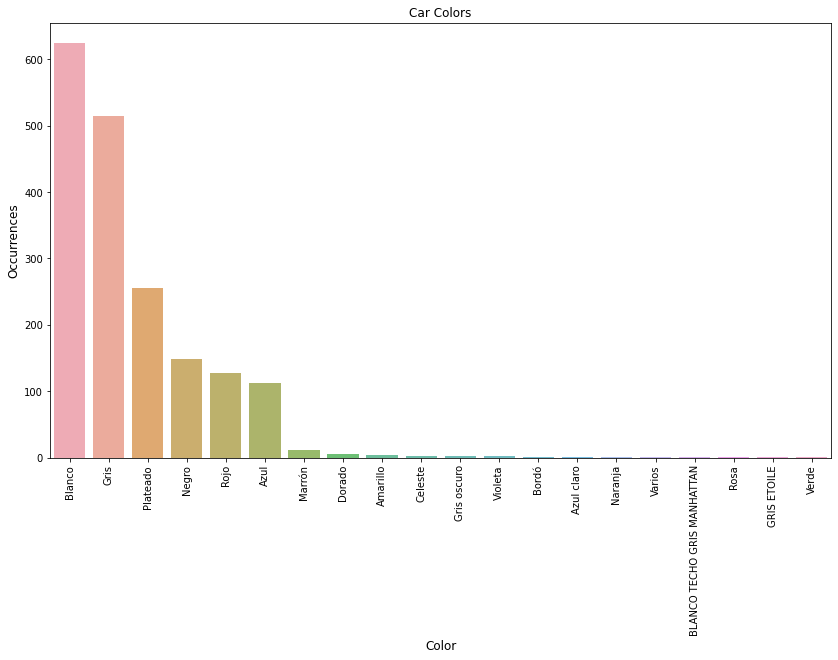

In [40]:
count  = new['color'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Car Colors')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Color', fontsize=12)
plt.show()

**Transmisions**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


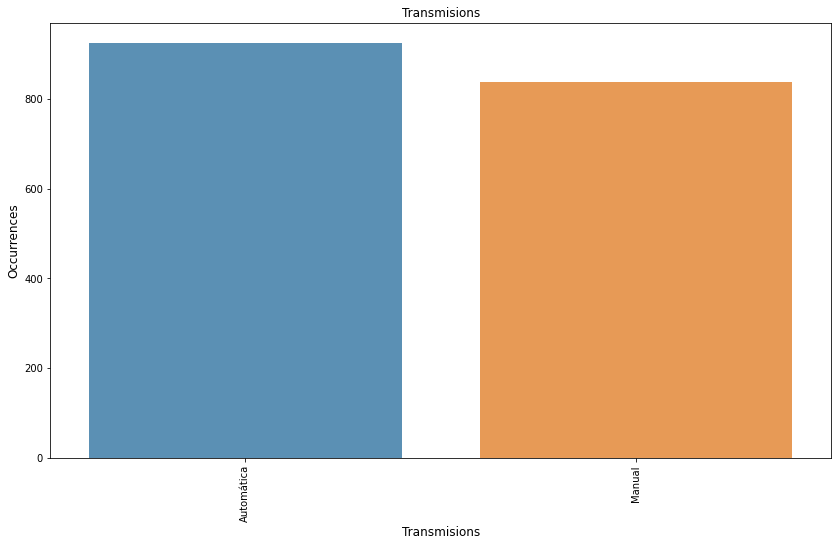

In [41]:
new = new[new['transmisions'].isin(['Manual','Automática'])]
count  = new['transmisions'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Transmisions')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Transmisions', fontsize=12)
plt.show()

**Bodywork**

Values with 'km' or '.' are invalied and need to be removed.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


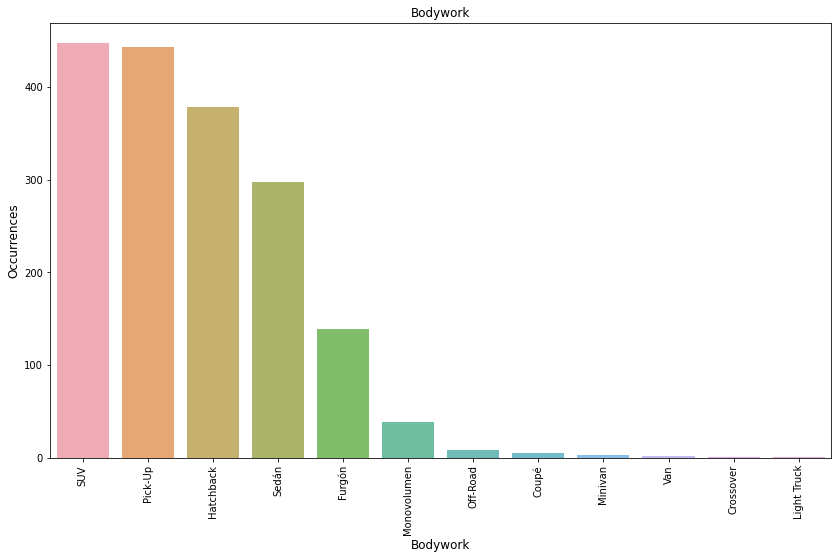

In [43]:
new = new[~new['bodywork'].str.endswith('km')]
new = new[~new['bodywork'].str.endswith('.')]
count  = new['bodywork'].value_counts()
plt.figure(figsize=(14,8))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('Bodywork')
plt.ylabel('Occurrences', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Bodywork', fontsize=12)
plt.show()

#Export Dataframes

In [44]:
new.to_csv('new_cleaned.csv')
used.to_csv('used_cleaned.csv')